# Practical session on Machine-Learning for SEQUENTIAL data 

We use a dataset containing inertial data timeseries from smartphones, recorded during several types of Human Activities. 
The goal of the practical session is to experiment with one of the Machine-Learning techniques dedicated to SEQUENTIAL data: Recurrent Neural Networks (RNNs).


### Step 1: Data loading and formatting training and test data


In [1]:
# Import Necessary packages 
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt
import sklearn as sk
import sys
import keras
print('Your python version: {}'.format(sys.version_info.major))

#Path to the dataset folder
filepath='./data/UCI_HAR/'

groups=['train','test']

for group in groups:
    prefix=filepath+group+'/InertialSignals/'    
    #Names of the inputs to the convolutional network
    #Two 3D raw features as inputs
    filenames = list()
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    
    loaded = []
    for name in filenames:
        file=open(prefix+name,'r')
        data = []
        for x in file:
            data.append([float(ts) for ts in x.split()])
        data = np.array(data)
        #Concatenation of all data concerning the two 3D raw features (body acceleration and angular velocity)
        loaded.append(data)
    
    #Name of the last 3D raw feature
    filenames_rest = ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    
    #First add the two previous 3D raw features
    loaded_all = []
    loaded_all += loaded
    
    #Then add the last 3D raw feature
    for name in filenames_rest:
        file=open(prefix+name,'r')
        data = []
        for x in file:
            data.append([float(ts) for ts in x.split()])
        data = np.array(data)
        #Concatenation of all data concerning all 3D raw features (body acceleration, angular velocity and total acceleration)
        loaded_all.append(data)
      
    # Stack group so that features are the 3rd dimension --> (samples, time steps, features)
    loaded = np.dstack(loaded)
    loaded_all = np.dstack(loaded_all)
    
    if group == 'train':
        #Training set for two 3D raw features
        tx_train = loaded
        #Training set for all 3D raw features
        tx_train_all = loaded_all
    if group =='test':
        #Testing set for two 3D raw features
        tx_test = loaded
        #Testing set for all 3D raw features
        tx_test_all = loaded_all
        
nbTimeseries = tx_train_all[0].shape[1]
lengthTimeseries = tx_train_all[0].shape[0]
print("Shape of examples:",tx_train_all[0].shape," (i.e. ",nbTimeseries," timeseries of length=",lengthTimeseries,")")

print("Training set shape:",tx_train_all.shape)
print("Test set shape:",tx_test_all.shape)

# Load labels 
y_train = []
y_test = []
y_train_file = open(filepath+'train/y_train.txt', 'r')
y_test_file = open(filepath+'test/y_test.txt', 'r')
for y in y_train_file:
    y_train.append(int(y.rstrip('\n')))  
for y in y_test_file:
    y_test.append(int(y.rstrip('\n')))
target_train = np.array(y_train) - 1
target_test = np.array(y_test) - 1

# Mapping table for classes
labels = {1:'WALKING', 2:'WALKING UPSTAIRS', 3:'WALKING DOWNSTAIRS',
          4:'SITTING', 5:'STANDING', 6:'LAYING'}

nbClasses = len(labels)
print("Number of classes =", nbClasses)
print("Activity classes (target values)",labels)

# Shuffle (because data is initially somewhat organized by class)
tx_train_all, target_train = sk.utils.shuffle(tx_train_all, target_train, random_state=0)
tx_test_all, target_test = sk.utils.shuffle(tx_test_all, target_test, random_state=0)


Your python version: 3
Shape of examples: (128, 9)  (i.e.  9  timeseries of length= 128 )
Training set shape: (7352, 128, 9)
Test set shape: (2947, 128, 9)
Number of classes = 6
Activity classes (target values) {1: 'WALKING', 2: 'WALKING UPSTAIRS', 3: 'WALKING DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}


### Step2: Display some of the timeseries (sanity check)



 body acceleration [ba_x, ba_y, ba_z]=f(time) for example #0

 body acceleration [ba_x, ba_y, ba_z]=f(time) for example #1

 body acceleration [ba_x, ba_y, ba_z]=f(time) for example #160

 body_gyro [bg_x, bg_y, bg_z]=f(time) for example #0

 body_gyro [bg_x, bg_y, bg_z]=f(time) for example #1

 body_gyro [bg_x, bg_y, bg_z]=f(time) for example #160

 ALL 9 channels of example #0 which has classID=LAYING

 ALL 9 channels of example #1 which has classID=STANDING

 ALL 9 channels of example #160 which has classID=WALKING UPSTAIRS


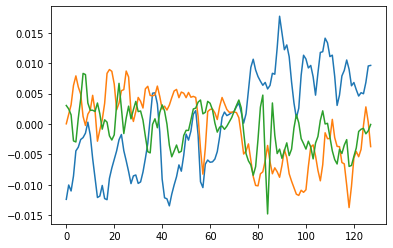

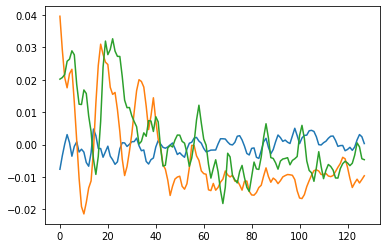

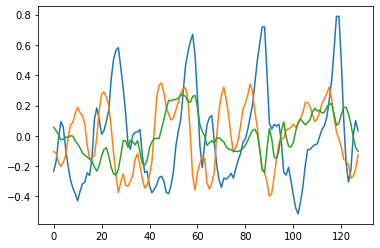

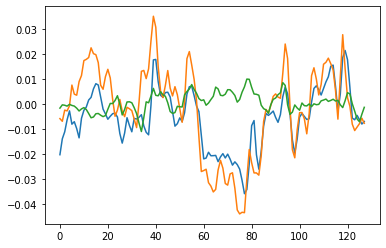

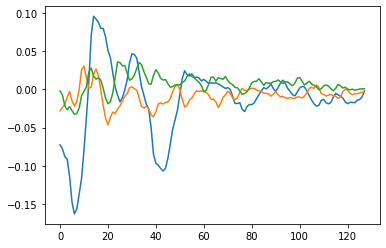

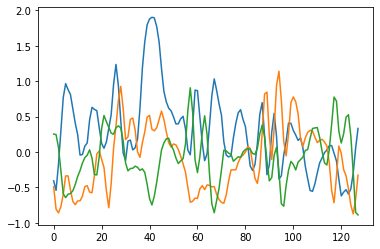

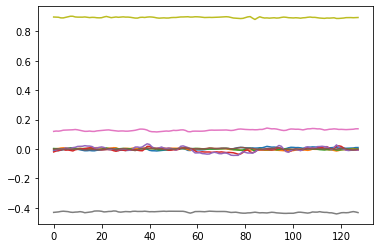

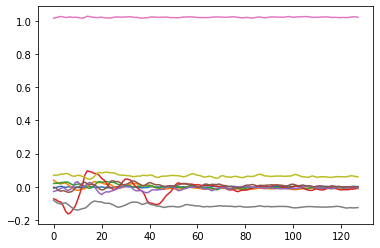

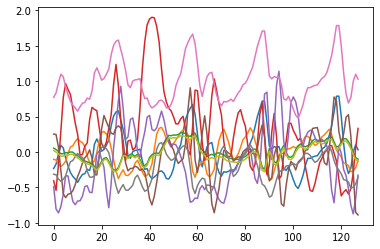

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

ex0 = tx_train_all[0].T # Transpose (for selection of body_acc variables)
ex0_body_acc = np.array([ex0[0] , ex0[1], ex0[2]])
ex0_body_acc = ex0_body_acc.T # Transpose back (for plotting)
ex0_body_gyro = np.array([ex0[3] , ex0[4], ex0[5]])
ex0_body_gyro = ex0_body_gyro.T # Transpose back (for plotting)
print("\n body acceleration [ba_x, ba_y, ba_z]=f(time) for example #0")
plt.plot(ex0_body_acc)
plt.show()

ex1 = tx_train_all[1].T # Transpose (for selection of body_acc variables))
ex1_body_acc = np.array([ex1[0] , ex1[1], ex1[2]])
ex1_body_acc = ex1_body_acc.T # Transpose back (for plotting)
ex1_body_gyro = np.array([ex1[3] , ex1[4], ex1[5]])
ex1_body_gyro = ex1_body_gyro.T # Transpose back (for plotting)
print("\n body acceleration [ba_x, ba_y, ba_z]=f(time) for example #1")
plt.plot(ex1_body_acc)
plt.show()

ex160 = tx_train_all[160].T # Transpose (for selection of body_acc variables))
ex160_body_acc = np.array([ex160[0] , ex160[1], ex160[2]])
ex160_body_acc = ex160_body_acc.T # Transpose back (for plotting)
ex160_body_gyro = np.array([ex160[3] , ex160[4], ex160[5]])
ex160_body_gyro = ex160_body_gyro.T # Transpose back (for plotting)
print("\n body acceleration [ba_x, ba_y, ba_z]=f(time) for example #160")
plt.plot(ex160_body_acc)
plt.show()

print("\n body_gyro [bg_x, bg_y, bg_z]=f(time) for example #0")
plt.plot(ex0_body_gyro)
plt.show()
print("\n body_gyro [bg_x, bg_y, bg_z]=f(time) for example #1")
plt.plot(ex1_body_gyro)
plt.show()
print("\n body_gyro [bg_x, bg_y, bg_z]=f(time) for example #160")
plt.plot(ex160_body_gyro)
plt.show()

print("\n ALL 9 channels of example #0 which has classID="+labels[target_train[0]+1])
plt.plot(tx_train_all[0])
plt.show()

print("\n ALL 9 channels of example #1 which has classID="+labels[target_train[1]+1])
plt.plot(tx_train_all[1])
plt.show()

print("\n ALL 9 channels of example #160 which has classID="+labels[target_train[160]+1])
plt.plot(tx_train_all[160])
plt.show()



### Train a LSTM Recurrent Neural Network 
Below is a code cell for creating and training a LSTM on the data. You may need to "play" with several hyper-parameters to obtain good results. Ideally, you should grid-search on at least the number of LSTM units and the learning_rate. If training becomes too long on your machine, you may want to execute rather on GoogleCOLAB.

In [3]:
import tensorflow as tf
import tensorflow.keras as tfk

print('Your tensorflow version: {}'.format(tf.__version__))
print("GPU : "+tf.test.gpu_device_name())

# Create the model architecture
model = tfk.Sequential()
nbUnits = 16
length = lengthTimeseries
model.add(tfk.layers.LSTM(units=nbUnits, activation='tanh',input_shape=(lengthTimeseries,nbTimeseries)))
model.add(tfk.layers.Dense(nbClasses, activation='softmax'))
model.summary()

# Train the model 
optim = tfk.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optim, metrics=['accuracy']) 
earlyStop = tfk.callbacks.EarlyStopping(monitor='val_loss', patience=9)
history=model.fit(tx_train_all, target_train, validation_split=0.3, batch_size=256, 
                  epochs=50, callbacks=[earlyStop])



Your tensorflow version: 2.3.1
GPU : /device:GPU:0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 16)                1664      
_________________________________________________________________
dense (Dense)                (None, 6)                 102       
Total params: 1,766
Trainable params: 1,766
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
21/21 [==============================] - 1s 24ms/step - loss: 1.7771 - accuracy: 0.2981 - val_loss: 1.7264 - val_accuracy: 0.4737
Epoch 2/50
21/21 [==============================] - 0s 9ms/step - loss: 1.6794 - accuracy: 0.4920 - val_loss: 1.6069 - val_ac

In [4]:
from keras.wrappers.scikit_learn import KerasClassifier

def create_model(nb_units=5, activation='tanh', dropout=0.0, recurrent_dropout=0.0):
    model = tfk.Sequential()
    model.add(tfk.layers.LSTM(units=nb_units, activation=activation,
                              dropout=dropout, recurrent_dropout=recurrent_dropout, input_shape=(lengthTimeseries,nbTimeseries)))
    model.add(tfk.layers.Dense(nbClasses, activation='softmax'))
    model.summary()
    optim = tfk.optimizers.Adam(learning_rate=0.001)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optim, metrics=['acc'])
    return model


#earlyStop = tfk.callbacks.EarlyStopping(monitor='val_loss', patience=9)
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=256, verbose=0)

In [5]:
from sklearn.model_selection import GridSearchCV
param_grid = [
  {'nb_units':[32, 64],
   'activation':('tanh', 'relu'),
   'dropout': [0, 0.1, 0.2],
   'recurrent_dropout': [0, 0.1, 0.2]}
 ]

grid = GridSearchCV(estimator=model,
                   param_grid=param_grid, cv=3, scoring='accuracy')
history = grid.fit(tx_train_all, target_train,validation_split=0.3, batch_size=256,
                  epochs=50)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                5376      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)             

#### Display the learning curves + evaluate on test set

Model: "sequential_110"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_110 (LSTM)              (None, 64)                18944     
_________________________________________________________________
dense_110 (Dense)            (None, 6)                 390       
Total params: 19,334
Trainable params: 19,334
Non-trainable params: 0
_________________________________________________________________
[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       496
           1       0.92      0.92      0.92       471
           2       0.91      0.97      0.94       420
           3       0.80      0.83      0.81       491
           4       0.83      0.80      0.81       532
           5       1.00      0.95      0.98       537

    accuracy                           0.90      2947
   macro avg       0.90      0.90      0.90    

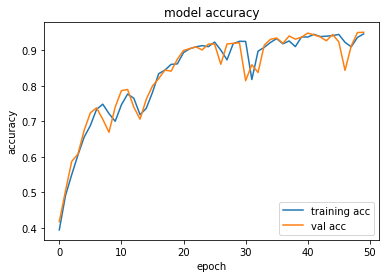

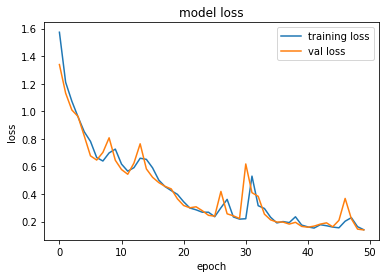

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
estimator = grid.best_estimator_
history = estimator.fit(tx_train_all, target_train,validation_split=0.3, batch_size=256,
                        epochs=50)
fig = plt.figure()
plt.plot(history.history['acc'],label='training acc')
plt.plot(history.history['val_acc'],label='val acc')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')

fig = plt.figure()
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')

# evaluate the network
print("[INFO] evaluating network...")
predictions = estimator.predict(tx_test_all, batch_size=32)
print(classification_report(target_test, predictions))
print(estimator)